In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CYCLE PARKING

In [502]:
# Read the provided CSV file/data set.
cycle_parking = pd.read_csv('cycle_parking.csv') 

# Print the output.
print(cycle_parking.info())
cycle_parking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23758 entries, 0 to 23757
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FEATURE_ID  23758 non-null  object
 1   SVDATE      23758 non-null  object
 2   PRK_CARR    23758 non-null  int64 
 3   PRK_COVER   23758 non-null  int64 
 4   PRK_SECURE  23758 non-null  int64 
 5   PRK_LOCKER  23758 non-null  int64 
 6   PRK_SHEFF   23758 non-null  int64 
 7   PRK_MSTAND  23758 non-null  int64 
 8   PRK_PSTAND  23758 non-null  int64 
 9   PRK_HOOP    23758 non-null  int64 
 10  PRK_POST    23758 non-null  int64 
 11  PRK_BUTERF  23758 non-null  int64 
 12  PRK_WHEEL   23758 non-null  int64 
 13  PRK_HANGAR  23758 non-null  int64 
 14  PRK_TIER    23758 non-null  int64 
 15  PRK_OTHER   23758 non-null  int64 
 16  PRK_PROVIS  23758 non-null  int64 
 17  PRK_CPT     23758 non-null  int64 
 18  BOROUGH     23758 non-null  object
 19  PHOTO1_URL  23758 non-null  object
 20  PHOTO2

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG014703,2017-09-07,0,0,0,0,0,0,0,0,...,0,1,0,0,1,6,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427797672, 51.5103212773)"
1,RWG014704,2017-09-07,0,0,0,0,0,0,0,0,...,0,1,0,0,1,6,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427846609, 51.5102610544)"
2,RWG014970,2017-06-20,0,0,0,0,1,0,0,0,...,0,0,0,0,1,2,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2405751224, 51.5014706358)"
3,RWG015506,2017-06-24,0,0,0,0,1,0,0,0,...,0,0,0,0,2,4,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2382877591, 51.5065007339)"
4,RWG015513,2017-09-07,0,0,0,0,1,0,0,0,...,0,0,0,0,2,4,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2384457427, 51.5062848196)"


In [503]:
# Check for missing values.
cycle_parking.isnull().sum()

FEATURE_ID    0
SVDATE        0
PRK_CARR      0
PRK_COVER     0
PRK_SECURE    0
PRK_LOCKER    0
PRK_SHEFF     0
PRK_MSTAND    0
PRK_PSTAND    0
PRK_HOOP      0
PRK_POST      0
PRK_BUTERF    0
PRK_WHEEL     0
PRK_HANGAR    0
PRK_TIER      0
PRK_OTHER     0
PRK_PROVIS    0
PRK_CPT       0
BOROUGH       0
PHOTO1_URL    0
PHOTO2_URL    0
geometry      0
dtype: int64

In [504]:
# Convert 'SVDATE' column to datetime dtype.
cycle_parking['SVDATE'] = pd.to_datetime(cycle_parking['SVDATE'])
# Check the types.
cycle_parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23758 entries, 0 to 23757
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FEATURE_ID  23758 non-null  object        
 1   SVDATE      23758 non-null  datetime64[ns]
 2   PRK_CARR    23758 non-null  int64         
 3   PRK_COVER   23758 non-null  int64         
 4   PRK_SECURE  23758 non-null  int64         
 5   PRK_LOCKER  23758 non-null  int64         
 6   PRK_SHEFF   23758 non-null  int64         
 7   PRK_MSTAND  23758 non-null  int64         
 8   PRK_PSTAND  23758 non-null  int64         
 9   PRK_HOOP    23758 non-null  int64         
 10  PRK_POST    23758 non-null  int64         
 11  PRK_BUTERF  23758 non-null  int64         
 12  PRK_WHEEL   23758 non-null  int64         
 13  PRK_HANGAR  23758 non-null  int64         
 14  PRK_TIER    23758 non-null  int64         
 15  PRK_OTHER   23758 non-null  int64         
 16  PRK_PROVIS  23758 non-

In [505]:
# Overview summary statistics.
cycle_parking.describe()

,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
count,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000
mean,0.032747,0.050678,0.008418,0.010817,0.738446,0.035525,0.004967,0.103039,0.001052,0.009386,0.006903,0.039187,0.004209,0.049541,2.846999,6.142857
std,0.177977,0.219343,0.091366,0.103445,0.439490,0.185106,0.070301,0.304016,0.032422,0.096429,0.082798,0.194043,0.064742,0.217000,3.340991,6.894307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000,168.000000


In [506]:
# How many dates we have for the parking records.
dates = cycle_parking.value_counts('SVDATE')
dates

SVDATE
2017-09-07    487
2017-07-13    408
2017-06-28    403
2017-06-27    402
2017-07-11    393
             ... 
2018-07-30      1
2018-04-18      1
2018-08-07      1
2019-06-07      1
2018-01-28      1
Length: 331, dtype: int64

<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

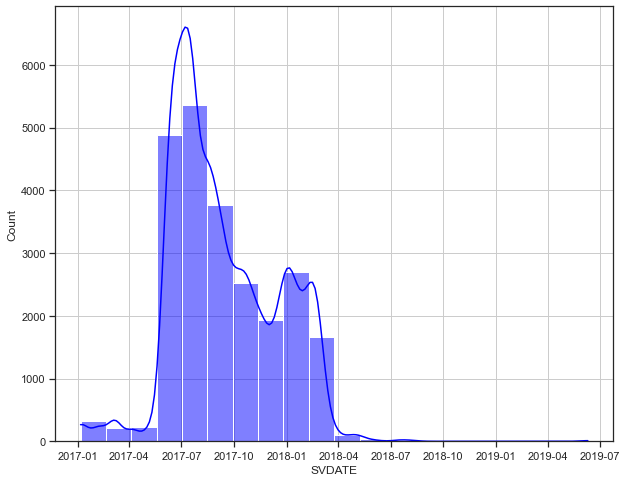

In [507]:
# Histogram to see the distribution.
sns.histplot(data = cycle_parking, x = 'SVDATE', color = 'blue', bins = 20, kde = True)

In [831]:
# Determine 5 boroughs WITH LARGEST cycle parking capacity in London.
df_parking = cycle_parking.groupby('BOROUGH')['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',
                                      'PRK_SHEFF', 'PRK_MSTAND', 'PRK_PSTAND',
                                      'PRK_HOOP', 'PRK_POST', 'PRK_BUTERF',
                                      'PRK_WHEEL', 'PRK_HANGAR', 'PRK_TIER',
                                      'PRK_OTHER', 'PRK_PROVIS', 'PRK_CPT'].sum().reset_index().\
                    sort_values(by='PRK_CPT', ascending = False)
df_parking.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/180389389.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_parking = cycle_parking.groupby('BOROUGH')['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',


,BOROUGH,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
11,Hackney,243,65,83,1277,10,2,503,0,18,6,299,1,95,5332,12322
32,Westminster,21,28,0,1049,4,4,506,6,15,1,2,0,17,5289,10703
27,Southwark,84,63,103,1231,4,4,3,2,10,12,99,4,39,4929,9951
5,Camden,36,52,0,668,719,1,164,2,9,9,18,9,38,4342,9023
21,Lambeth,137,59,3,980,19,18,185,1,14,4,148,12,45,3522,8590


In [833]:
# Overview summary statistics.
df_parking.describe()

,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,23.575758,36.484848,7.787879,531.636364,25.575758,3.575758,74.181818,0.757576,6.757576,4.969697,28.212121,3.030303,35.666667,2049.666667,4422.484848
std,50.259968,18.267323,22.620176,356.866381,124.695136,12.031288,147.232056,1.768303,4.717191,3.860739,59.016818,3.745705,73.347489,1371.397204,2909.920243
min,0.000000,11.000000,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,527.000000,1180.000000
25%,1.000000,23.000000,0.000000,288.000000,0.000000,0.000000,3.000000,0.000000,3.000000,2.000000,2.000000,0.000000,11.000000,1035.000000,2392.000000
50%,2.000000,36.000000,1.000000,423.000000,2.000000,0.000000,14.000000,0.000000,6.000000,4.000000,8.000000,2.000000,15.000000,1540.000000,3387.000000
75%,20.000000,48.000000,3.000000,668.000000,4.000000,2.000000,37.000000,0.000000,10.000000,7.000000,18.000000,4.000000,38.000000,2885.000000,5902.000000
max,243.000000,90.000000,103.000000,1448.000000,719.000000,68.000000,509.000000,7.000000,18.000000,14.000000,299.000000,15.000000,427.000000,5332.000000,12322.000000


In [835]:
df_parking.to_csv('parking.csv')

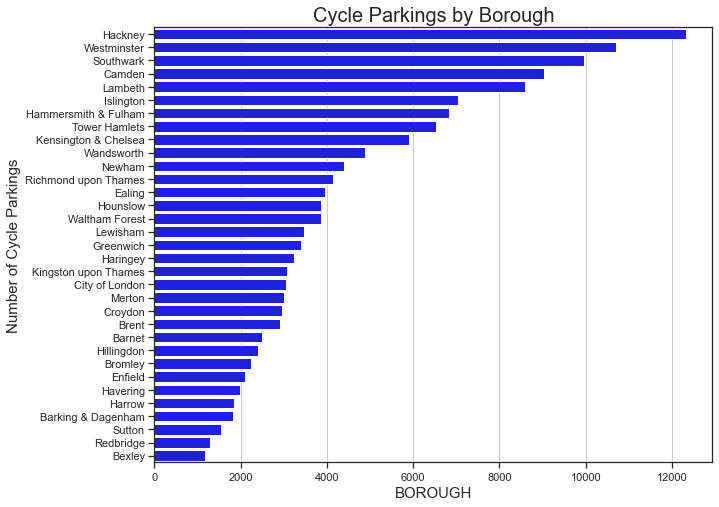

In [510]:
# Create a barplot.
b=sns.barplot(y='BOROUGH', x='PRK_CPT', data=df_parking, color = 'blue')

# Annotate the axes, labels and ticks.
b.set_xlabel('BOROUGH', fontsize=15)
b.set_ylabel('Number of Cycle Parkings', fontsize=15)
b.set_title("Cycle Parkings by Borough", fontsize=20)
i=0

In [511]:
# Determine cycle parking capacity change over years in London.
df_parking1 = cycle_parking.groupby([cycle_parking['BOROUGH'], cycle_parking['SVDATE'].dt.year.rename('YEAR')])['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',
                                      'PRK_SHEFF', 'PRK_MSTAND', 'PRK_PSTAND',
                                      'PRK_HOOP', 'PRK_POST', 'PRK_BUTERF',
                                      'PRK_WHEEL', 'PRK_HANGAR', 'PRK_TIER',
                                      'PRK_OTHER', 'PRK_PROVIS', 'PRK_CPT'].sum().reset_index().\
                    sort_values(by=['BOROUGH', 'PRK_CPT'], ascending = False)
df_parking1.head(10)

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/436018714.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_parking1 = cycle_parking.groupby([cycle_parking['BOROUGH'], cycle_parking['SVDATE'].dt.year.rename('YEAR')])['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',


,BOROUGH,YEAR,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
61,Westminster,2017,21,28,0,1049,4,4,506,6,15,1,2,0,17,5289,10703
59,Wandsworth,2017,4,53,5,608,39,1,37,4,17,9,5,0,21,2326,4819
60,Wandsworth,2018,0,0,0,10,0,0,0,0,0,0,0,0,1,30,60
57,Waltham Forest,2017,94,17,2,77,0,6,3,0,1,14,100,6,418,1600,3673
58,Waltham Forest,2018,1,2,1,12,0,0,0,0,0,0,2,0,9,95,186
55,Tower Hamlets,2017,8,84,26,670,4,4,43,0,8,1,11,3,67,2941,6413
56,Tower Hamlets,2018,0,6,0,4,0,0,0,0,3,0,0,0,6,70,122
53,Sutton,2017,1,10,0,229,3,0,1,0,6,0,0,1,1,510,1127
54,Sutton,2018,0,5,0,64,0,0,0,0,0,1,0,2,1,152,413
51,Southwark,2017,84,61,103,1182,3,3,3,2,4,12,99,4,39,4719,9543


In [512]:
# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

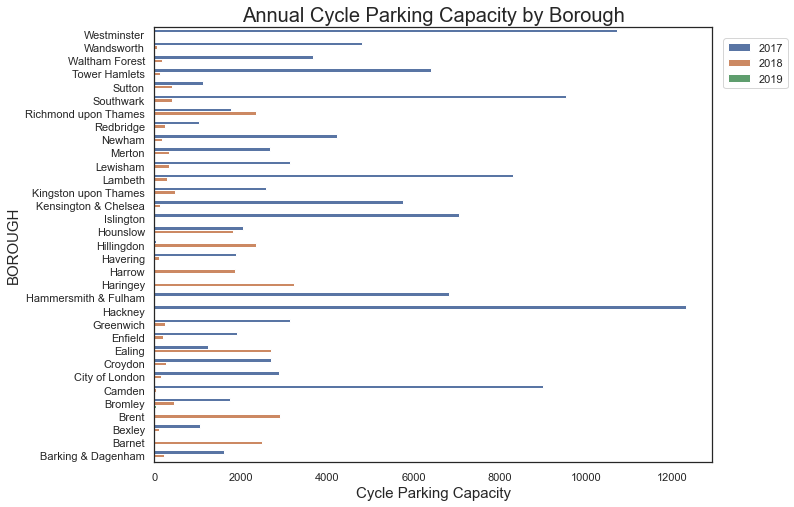

In [513]:
# Plot the changes in parking capacity by borough over the years.
b=sns.barplot(y='BOROUGH', x='PRK_CPT', data=df, hue = 'YEAR')

# Annotate the axes, labels and ticks.
b.set_xlabel('Cycle Parking Capacity', fontsize=15)
b.set_ylabel('BOROUGH', fontsize=15)
b.set_title('Annual Cycle Parking Capacity by Borough', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# CYCLE LANES

In [237]:
# Check the dataset with cycle lanes information.
cycle_lane = pd.read_csv('cycle_lane.csv')
print(cycle_lane.shape)
cycle_lane.head()

(24690, 24)


,FEATURE_ID,SVDATE,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,...,CLT_PARKR,CLT_WATERR,CLT_PTIME,CLT_ACCESS,CLT_COLOUR,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,length_m
0,RWG154837,2017-10-14,1,0,0,0,0,0,1,0,...,0,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353420094, 0.1334807414, 51.57163711...",133.855087
1,RWG154839,2017-10-14,1,0,0,0,0,0,1,0,...,0,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1318879179, 0.1312756444, 0.130977767...",85.062151
2,RWG154848,2017-10-14,1,0,0,0,0,0,1,1,...,0,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353045555, 0.1348398673, 0.134440865...",250.379093
3,RWG154853,2017-10-15,1,0,0,0,0,0,1,0,...,0,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.141811741, 0.1412961068, 51.572411971...",142.500994
4,RWG155003,2017-10-17,1,0,0,0,0,1,0,0,...,0,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1408697848, 0.1406946062, 0.140513785...",24.619673


In [243]:
# Convert 'SVDATE' column to datetime dtype.
cycle_lane['SVDATE'] = pd.to_datetime(cycle_lane['SVDATE'])
# Check the types.
cycle_lane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24690 entries, 0 to 24689
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FEATURE_ID  24690 non-null  object        
 1   SVDATE      24690 non-null  datetime64[ns]
 2   CLT_CARR    24690 non-null  int64         
 3   CLT_SEGREG  24690 non-null  int64         
 4   CLT_STEPP   24690 non-null  int64         
 5   CLT_PARSEG  24690 non-null  int64         
 6   CLT_SHARED  24690 non-null  int64         
 7   CLT_MANDAT  24690 non-null  int64         
 8   CLT_ADVIS   24690 non-null  int64         
 9   CLT_PRIORI  24690 non-null  int64         
 10  CLT_CONTRA  24690 non-null  int64         
 11  CLT_BIDIRE  24690 non-null  int64         
 12  CLT_CBYPAS  24690 non-null  int64         
 13  CLT_BBYPAS  24690 non-null  int64         
 14  CLT_PARKR   24690 non-null  int64         
 15  CLT_WATERR  24690 non-null  int64         
 16  CLT_PTIME   24690 non-

In [239]:
# Add length in km to the dataframe.
cycle_lane['length_km'] = cycle_lane['length_m']/1000
cycle_lane.head()

,FEATURE_ID,SVDATE,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,...,CLT_WATERR,CLT_PTIME,CLT_ACCESS,CLT_COLOUR,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,length_m,length_km
0,RWG154837,2017-10-14,1,0,0,0,0,0,1,0,...,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353420094, 0.1334807414, 51.57163711...",133.855087,0.133855
1,RWG154839,2017-10-14,1,0,0,0,0,0,1,0,...,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1318879179, 0.1312756444, 0.130977767...",85.062151,0.085062
2,RWG154848,2017-10-14,1,0,0,0,0,0,1,1,...,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353045555, 0.1348398673, 0.134440865...",250.379093,0.250379
3,RWG154853,2017-10-15,1,0,0,0,0,0,1,0,...,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.141811741, 0.1412961068, 51.572411971...",142.500994,0.142501
4,RWG155003,2017-10-17,1,0,0,0,0,1,0,0,...,0,0,not available,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1408697848, 0.1406946062, 0.140513785...",24.619673,0.024620


In [240]:
# Overview summary statistics.
cycle_lane.describe()

,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,length_m,length_km
count,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000
mean,0.555853,0.077116,0.004212,0.142851,0.404820,0.073876,0.290117,0.090725,0.060186,0.407250,0.002552,0.005346,0.161320,0.022155,0.111219,115.819779,0.115820
std,0.496881,0.266781,0.064766,0.349928,0.490867,0.261574,0.453826,0.287223,0.237837,0.491332,0.050450,0.072924,0.367834,0.147190,0.314410,398.226822,0.398227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278985,0.000279
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.852690,0.015853
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.564727,0.043565
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.450818,0.107451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19778.644986,19.778645


<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

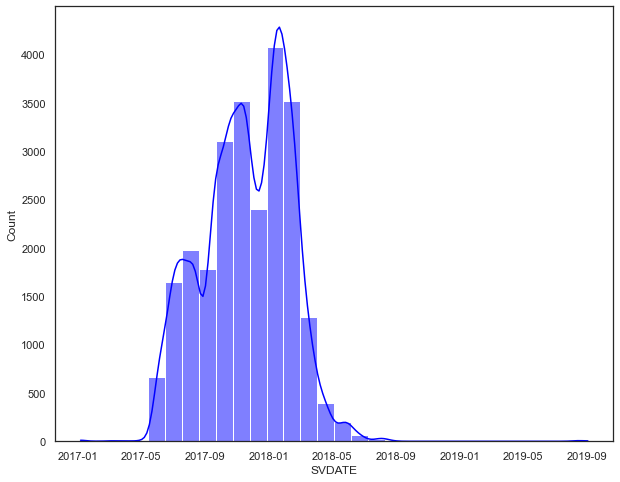

In [361]:
# Histogram to see the distribution.
sns.histplot(data = cycle_lane, x = 'SVDATE', color = 'blue', bins = 30, kde = True)

In [200]:
# Determine 5 boroughs with the longest cycle lanes available in London.
df_cl = cycle_lane.groupby('BOROUGH')['CLT_CARR', 'CLT_SEGREG', 'CLT_STEPP',
                                    'CLT_PARSEG', 'CLT_SHARED', 'CLT_MANDAT',
                                    'CLT_ADVIS', 'CLT_PRIORI', 'CLT_CONTRA',
                                    'CLT_BIDIRE', 'CLT_CBYPAS', 'CLT_BBYPAS',
                                    'CLT_BBYPAS', 'CLT_PARKR', 'CLT_WATERR',
                                    'CLT_PTIME', 'length_km'].sum().\
                        reset_index().sort_values(by='length_km', ascending = False)
df_cl.head(10)

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/1059257007.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cl = cycle_lane.groupby('BOROUGH')['CLT_CARR', 'CLT_SEGREG', 'CLT_STEPP',


,BOROUGH,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,length_km
17,Hounslow,520,124,5,188,439,70,313,86,34,544,2,2,2,138,17,51,139.940911
24,Newham,474,61,2,196,463,82,265,83,35,547,1,5,5,194,25,164,138.095383
26,Richmond upon Thames,238,22,0,67,332,71,130,36,9,360,0,0,0,167,37,69,135.449463
8,Ealing,639,66,3,155,545,89,366,104,72,557,1,4,4,185,33,130,135.083704
10,Greenwich,395,72,2,199,479,83,191,79,37,564,2,6,6,218,87,70,121.963289
9,Enfield,294,56,0,405,292,104,114,60,5,485,0,25,25,87,12,82,116.309068
7,Croydon,662,42,1,33,262,59,487,151,101,242,2,1,1,102,1,41,114.658991
25,Redbridge,454,30,0,70,180,19,402,94,23,228,0,1,1,134,17,47,114.520396
4,Bromley,187,34,1,79,231,30,111,38,4,291,1,0,0,158,4,17,111.455532
0,Barking & Dagenham,420,38,0,146,296,32,301,123,21,335,1,2,2,94,8,58,105.235904


In [201]:
# Overview summary statistics.
df_cl.describe()

,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,length_km
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,415.878788,57.696970,3.151515,106.878788,302.878788,55.272727,217.060606,67.878788,45.030303,304.696970,1.909091,4.000000,4.000000,120.696970,16.575758,83.212121,86.654253
std,190.154831,34.421546,5.178810,80.264312,120.815137,38.000224,116.431026,43.542190,39.846961,143.560851,2.578319,7.062223,7.062223,62.943171,17.106341,64.223125,31.804299
min,90.000000,2.000000,0.000000,9.000000,43.000000,4.000000,22.000000,5.000000,3.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,20.811776
25%,294.000000,36.000000,0.000000,52.000000,225.000000,29.000000,111.000000,34.000000,10.000000,228.000000,0.000000,0.000000,0.000000,76.000000,6.000000,29.000000,65.816011
50%,420.000000,52.000000,1.000000,88.000000,292.000000,40.000000,200.000000,60.000000,32.000000,291.000000,1.000000,1.000000,1.000000,106.000000,10.000000,61.000000,88.488331
75%,512.000000,66.000000,3.000000,146.000000,369.000000,83.000000,299.000000,104.000000,75.000000,392.000000,2.000000,5.000000,5.000000,167.000000,25.000000,142.000000,111.455532
max,796.000000,162.000000,19.000000,405.000000,545.000000,140.000000,487.000000,158.000000,145.000000,564.000000,9.000000,30.000000,30.000000,235.000000,87.000000,256.000000,139.940911


In [836]:
df_cl.to_csv('cl.csv')

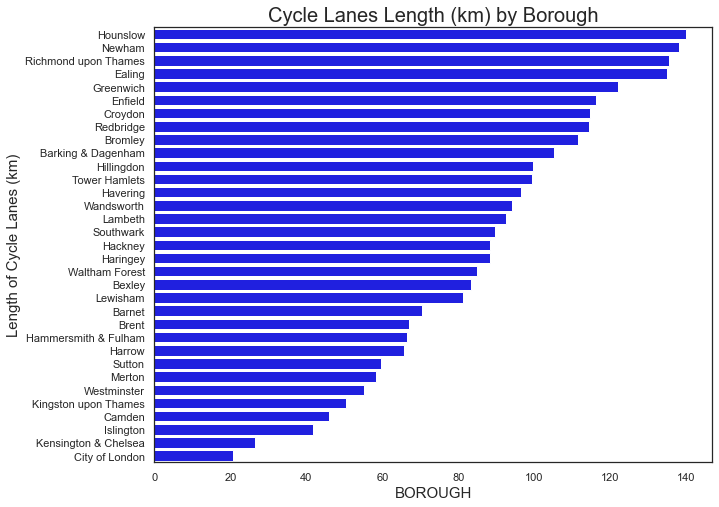

In [367]:
# Create a lineplot.
b=sns.barplot(y='BOROUGH', x='length_km', data=df_cl, color = 'blue')

# Annotate the axes, labels and ticks.
b.set_xlabel('BOROUGH', fontsize=15)
b.set_ylabel('Length of Cycle Lanes (km)', fontsize=15)
b.set_title("Cycle Lanes Length (km) by Borough", fontsize=20)
i=0

In [244]:
# Determine cycle lane length change over years in London.
df_cl1 = cycle_lane.groupby([cycle_lane['BOROUGH'], cycle_lane['SVDATE'].dt.year.rename('YEAR')])\
                                    ['CLT_CARR', 'CLT_SEGREG', 'CLT_STEPP',
                                    'CLT_PARSEG', 'CLT_SHARED', 'CLT_MANDAT',
                                    'CLT_ADVIS', 'CLT_PRIORI', 'CLT_CONTRA',
                                    'CLT_BIDIRE', 'CLT_CBYPAS', 'CLT_BBYPAS',
                                    'CLT_BBYPAS', 'CLT_PARKR', 'CLT_WATERR',
                                    'CLT_PTIME', 'length_km'].sum(). reset_index().\
                    sort_values(by=['length_km'], ascending = False)
df_cl1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/4227134019.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cl1 = cycle_lane.groupby([cycle_lane['BOROUGH'], cycle_lane['SVDATE'].dt.year.rename('YEAR')])\


,BOROUGH,YEAR,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,length_km
16,Ealing,2018,546,56,3,149,486,75,322,88,62,512,1,4,4,150,33,107,122.922184
33,Hounslow,2018,352,78,4,136,315,47,222,55,24,399,1,2,2,117,17,25,110.865889
31,Hillingdon,2018,234,60,3,167,316,27,143,42,5,465,1,1,1,91,39,20,97.056187
57,Tower Hamlets,2017,549,132,19,97,307,72,226,110,24,308,1,24,24,167,38,111,93.772862
52,Richmond upon Thames,2018,178,21,0,54,262,62,92,27,8,295,0,0,0,139,28,63,89.148213


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


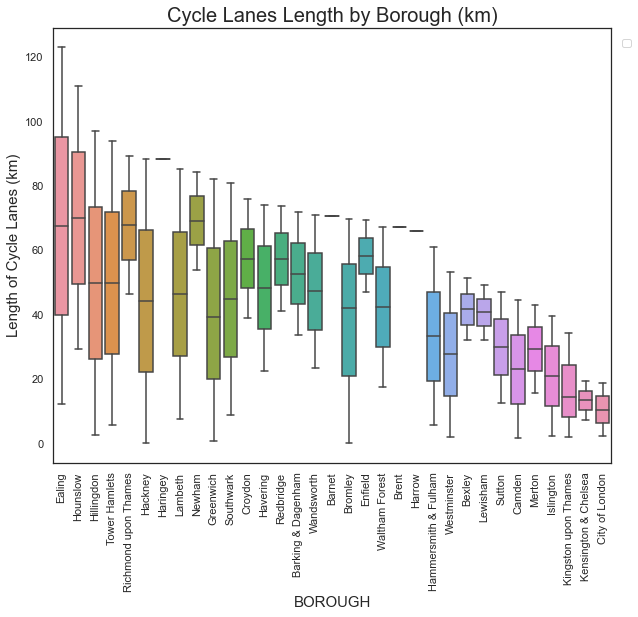

In [246]:
# Create a boxplot to investigate spread of cycle lanes length by borough.
graph = sns.boxplot(data=df_cl1, x='BOROUGH', y='length_km')

# Annotate the axes, labels and ticks.
plt.xticks(rotation=90)
graph.set_xlabel('BOROUGH', fontsize=15)
graph.set_ylabel('Length of Cycle Lanes (km)', fontsize=15)
graph.set_title('Cycle Lanes Length by Borough (km)', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

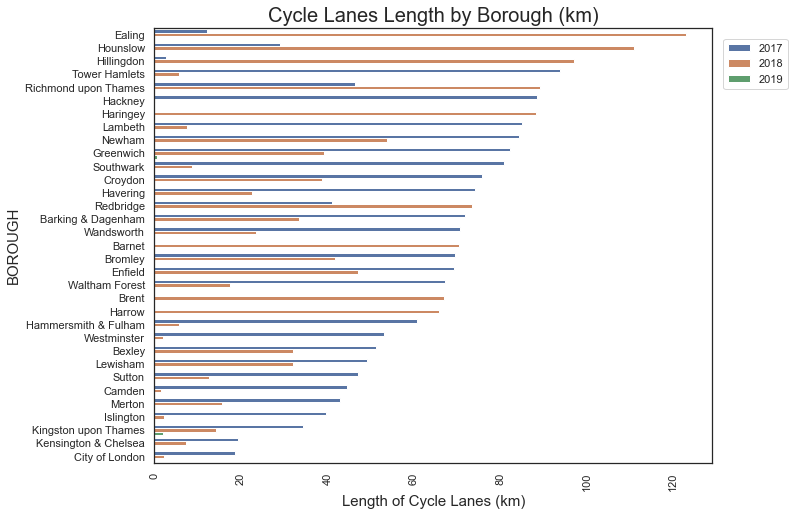

In [247]:
# Plot the cycle lanes length by borough changing over years by borough.
c=sns.barplot(y='BOROUGH', x='length_km', data=df_cl1, hue = 'YEAR')

# Annotate the axes, labels and ticks.
plt.xticks(rotation=90)
c.set_xlabel('Length of Cycle Lanes (km)', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title('Cycle Lanes Length by Borough (km)', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# Traffic Calming 

In [248]:
# Create a df with road traffic measures information.
cycle_calm = pd.read_csv('cycle_calm.csv')
cycle_calm.head()

,FEATURE_ID,SVDATE,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG001968,2017-05-29,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1741789436, 51.5553017001)"
1,RWG001970,2017-05-29,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1757749508, 51.5516771201)"
2,RWG001983,2017-05-30,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1761533961, 51.5556973953)"
3,RWG001985,2017-05-30,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1746229436, 51.5576445334)"
4,RWG002008,2017-05-30,1,0,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.146761597, 51.5486138321)"


In [79]:
# View the information.
cycle_calm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58565 entries, 0 to 58564
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FEATURE_ID  58565 non-null  object
 1   SVDATE      58565 non-null  object
 2   TRF_RAISED  58565 non-null  int64 
 3   TRF_ENTRY   58565 non-null  int64 
 4   TRF_CUSHI   58565 non-null  int64 
 5   TRF_HUMP    58565 non-null  int64 
 6   TRF_SINUSO  58565 non-null  int64 
 7   TRF_BARIER  58565 non-null  int64 
 8   TRF_NAROW   58565 non-null  int64 
 9   TRF_CALM    58565 non-null  int64 
 10  BOROUGH     58565 non-null  object
 11  PHOTO1_URL  58565 non-null  object
 12  PHOTO2_URL  58565 non-null  object
 13  geometry    58565 non-null  object
dtypes: int64(8), object(6)
memory usage: 6.3+ MB


In [249]:
# Convert 'SVDATE' column to datetime dtype.
cycle_calm['SVDATE'] = pd.to_datetime(cycle_calm['SVDATE'])
# Check the types.
cycle_calm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58565 entries, 0 to 58564
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FEATURE_ID  58565 non-null  object        
 1   SVDATE      58565 non-null  datetime64[ns]
 2   TRF_RAISED  58565 non-null  int64         
 3   TRF_ENTRY   58565 non-null  int64         
 4   TRF_CUSHI   58565 non-null  int64         
 5   TRF_HUMP    58565 non-null  int64         
 6   TRF_SINUSO  58565 non-null  int64         
 7   TRF_BARIER  58565 non-null  int64         
 8   TRF_NAROW   58565 non-null  int64         
 9   TRF_CALM    58565 non-null  int64         
 10  BOROUGH     58565 non-null  object        
 11  PHOTO1_URL  58565 non-null  object        
 12  PHOTO2_URL  58565 non-null  object        
 13  geometry    58565 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 6.3+ MB


<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

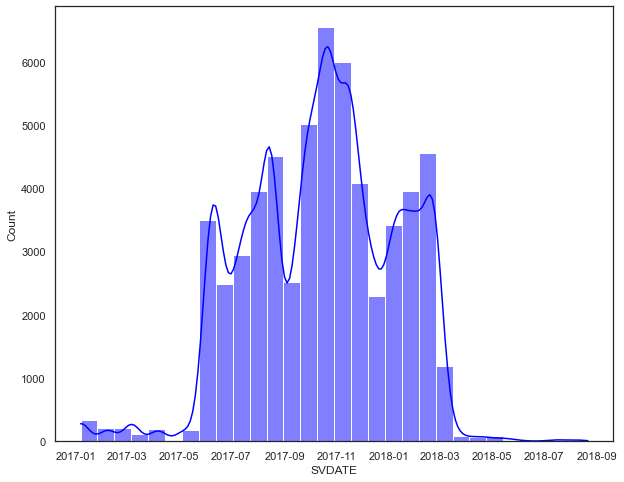

In [362]:
# Histogram to see the distribution.
sns.histplot(data = cycle_calm, x = 'SVDATE', color = 'blue', bins = 30, kde = True)

In [250]:
# Create additional column summing up all traffic measures.
cycle_calm['TOTAL_TRF'] = cycle_calm[['TRF_RAISED', 'TRF_ENTRY', 'TRF_CUSHI',
                        'TRF_HUMP', 'TRF_SINUSO', 'TRF_BARIER',
                        'TRF_NAROW', 'TRF_CALM']].sum(axis=1)
cycle_calm.head()     

,FEATURE_ID,SVDATE,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,TOTAL_TRF
0,RWG001968,2017-05-29,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1741789436, 51.5553017001)",1
1,RWG001970,2017-05-29,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1757749508, 51.5516771201)",1
2,RWG001983,2017-05-30,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1761533961, 51.5556973953)",1
3,RWG001985,2017-05-30,0,1,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1746229436, 51.5576445334)",1
4,RWG002008,2017-05-30,1,0,0,0,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.146761597, 51.5486138321)",1


In [251]:
# Determine 5 boroughs with the largest number of speed calming measures in London.
df_calm = cycle_calm.groupby('BOROUGH')['TRF_RAISED', 'TRF_ENTRY', 'TRF_CUSHI',
                                             'TRF_HUMP', 'TRF_SINUSO', 'TRF_BARIER',
                                             'TRF_NAROW', 'TRF_CALM', 'TOTAL_TRF'].sum().\
                        reset_index().sort_values(by='TOTAL_TRF', ascending = False)
df_calm.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/228582919.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_calm = cycle_calm.groupby('BOROUGH')['TRF_RAISED', 'TRF_ENTRY', 'TRF_CUSHI',


,BOROUGH,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,TOTAL_TRF
27,Southwark,141,507,793,1999,721,52,15,36,4264
22,Lewisham,101,262,674,2521,175,26,9,11,3779
24,Newham,123,268,418,2222,534,17,17,38,3637
21,Lambeth,150,455,720,1581,582,38,24,21,3571
30,Waltham Forest,172,249,469,1604,908,26,20,19,3467


In [252]:
# Overview the summary statistics.
df_calm.describe()

,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,TOTAL_TRF
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,84.000000,229.727273,382.606061,1008.212121,203.636364,28.333333,20.060606,21.848485,1978.424242
std,50.891429,129.469415,305.435543,635.046640,220.634004,17.515469,13.214432,16.822829,1106.674467
min,10.000000,21.000000,0.000000,29.000000,8.000000,2.000000,1.000000,0.000000,190.000000
25%,44.000000,123.000000,199.000000,577.000000,49.000000,17.000000,10.000000,7.000000,1081.000000
50%,68.000000,227.000000,339.000000,890.000000,117.000000,26.000000,18.000000,18.000000,1630.000000
75%,120.000000,311.000000,520.000000,1356.000000,253.000000,37.000000,27.000000,36.000000,3008.000000
max,204.000000,507.000000,1458.000000,2521.000000,908.000000,84.000000,51.000000,57.000000,4264.000000


In [837]:
df_calm.to_csv('calm.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


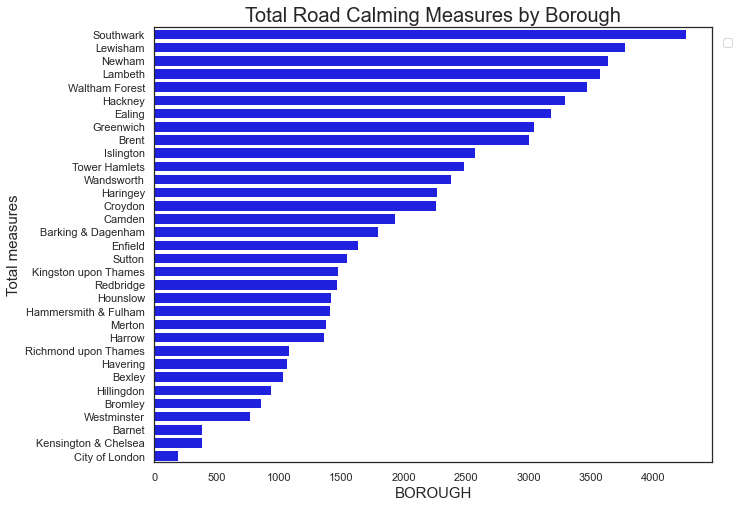

In [207]:
# Create a lineplot.
c=sns.barplot(y='BOROUGH', x='TOTAL_TRF', data=df_calm, color = 'blue')

# Annotate the axes, labels and ticks.
#plt.xticks(rotation=90)
c.set_xlabel('BOROUGH', fontsize=15)
c.set_ylabel('Total measures', fontsize=15)
c.set_title("Total Road Calming Measures by Borough", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

In [253]:
# Determine cycle parking capacity change over years in London.
df_calm1 = cycle_calm.groupby([cycle_calm['BOROUGH'], cycle_calm['SVDATE'].dt.year.rename('YEAR')])\
                                    ['TRF_RAISED', 'TRF_ENTRY', 'TRF_CUSHI',
                                    'TRF_HUMP', 'TRF_SINUSO', 'TRF_BARIER',
                                    'TRF_NAROW', 'TRF_CALM', 'TOTAL_TRF'].sum().reset_index().\
                    sort_values(by=['TOTAL_TRF'], ascending = False)
df_calm1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/2846720273.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_calm1 = cycle_calm.groupby([cycle_calm['BOROUGH'], cycle_calm['SVDATE'].dt.year.rename('YEAR')])\


,BOROUGH,YEAR,TRF_RAISED,TRF_ENTRY,TRF_CUSHI,TRF_HUMP,TRF_SINUSO,TRF_BARIER,TRF_NAROW,TRF_CALM,TOTAL_TRF
52,Southwark,2017,140,506,786,1987,717,51,15,36,4238
42,Lewisham,2017,96,254,667,2486,174,23,8,10,3718
46,Newham,2017,121,260,402,2201,531,16,13,37,3581
40,Lambeth,2017,150,448,717,1574,582,35,22,21,3549
58,Waltham Forest,2017,169,243,469,1586,903,23,19,14,3426


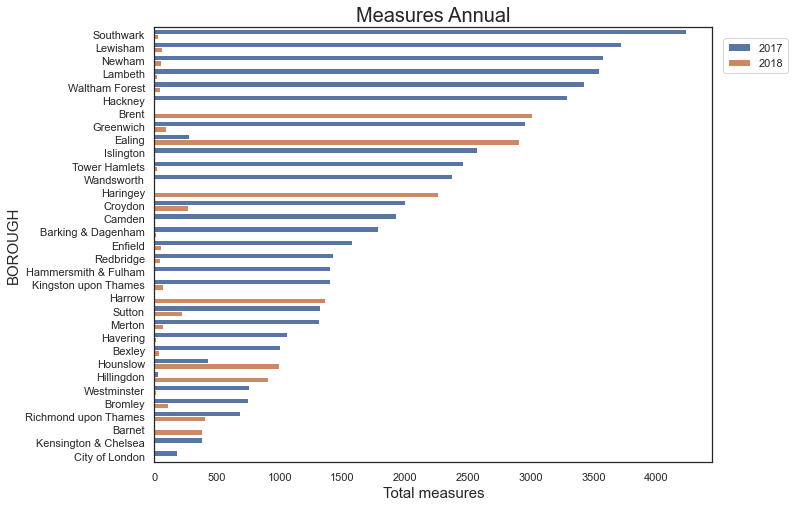

In [256]:
# Plot the changes in traffic calming neasures by borough over years.
c=sns.barplot(y='BOROUGH', x='TOTAL_TRF', data=df_calm1, hue = 'YEAR')

# Annotate the axes, labels and ticks.
c.set_xlabel('Total measures', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title('Measures Annual', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# Advanced Stop Lines (ASL).

In [257]:
# Check the dataset with cycle lanes information.
cycle_asl = pd.read_csv('cycle_asl.csv')
print(cycle_asl.shape)
cycle_asl.head()

(3775, 13)


,FEATURE_ID,SVDATE,ASL_FDR,ASL_FDRLFT,ASL_FDCENT,ASL_FDRIGH,ASL_SHARED,ASL_COLOUR,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,asl_length_m
0,RWG276569,2018-03-07,0,0,0,0,0,NONE,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG27...,https://cycleassetimages.data.tfl.gov.uk/RWG27...,"c(-0.1092281318, -0.1091707856, 51.6179137048,...",3.990710
1,RWG276570,2018-03-09,0,0,0,0,0,NONE,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG27...,https://cycleassetimages.data.tfl.gov.uk/RWG27...,"c(-0.1098967152, -0.1098310271, 51.6157537853,...",4.611985
2,RWG276571,2018-03-09,0,0,0,0,0,NONE,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG27...,https://cycleassetimages.data.tfl.gov.uk/RWG27...,"c(-0.109366475, -0.1093217146, 51.6178078951, ...",4.380597
3,RWG150409,2017-09-19,0,0,0,0,0,NONE,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"c(-0.0954800686, -0.0953756273, 51.6320199482,...",8.264028
4,RWG150410,2017-09-20,0,0,0,0,0,NONE,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"c(-0.0600649014, -0.0601774558, 51.6448590734,...",7.766458


In [258]:
# Check the datatypes.
cycle_asl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FEATURE_ID    3775 non-null   object 
 1   SVDATE        3775 non-null   object 
 2   ASL_FDR       3775 non-null   int64  
 3   ASL_FDRLFT    3775 non-null   int64  
 4   ASL_FDCENT    3775 non-null   int64  
 5   ASL_FDRIGH    3775 non-null   int64  
 6   ASL_SHARED    3775 non-null   int64  
 7   ASL_COLOUR    3775 non-null   object 
 8   BOROUGH       3775 non-null   object 
 9   PHOTO1_URL    3775 non-null   object 
 10  PHOTO2_URL    3775 non-null   object 
 11  geometry      3775 non-null   object 
 12  asl_length_m  3775 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 383.5+ KB


In [259]:
# Check for missing values.
cycle_asl.isnull().sum()

FEATURE_ID      0
SVDATE          0
ASL_FDR         0
ASL_FDRLFT      0
ASL_FDCENT      0
ASL_FDRIGH      0
ASL_SHARED      0
ASL_COLOUR      0
BOROUGH         0
PHOTO1_URL      0
PHOTO2_URL      0
geometry        0
asl_length_m    0
dtype: int64

In [260]:
# Overview the statistics.
cycle_asl.describe()

,ASL_FDR,ASL_FDRLFT,ASL_FDCENT,ASL_FDRIGH,ASL_SHARED,asl_length_m
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,0.472318,0.449007,0.020662,0.007152,0.001854,4.588807
std,0.499299,0.497459,0.142270,0.084280,0.043027,1.217385
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.221646
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.891573
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.494096
75%,1.000000,1.000000,0.000000,0.000000,0.000000,5.074204
max,1.000000,1.000000,1.000000,1.000000,1.000000,20.571711


In [261]:
# Convert 'SVDATE' column to datetime dtype.
cycle_asl['SVDATE'] = pd.to_datetime(cycle_asl['SVDATE'])
# Check the types.
cycle_asl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FEATURE_ID    3775 non-null   object        
 1   SVDATE        3775 non-null   datetime64[ns]
 2   ASL_FDR       3775 non-null   int64         
 3   ASL_FDRLFT    3775 non-null   int64         
 4   ASL_FDCENT    3775 non-null   int64         
 5   ASL_FDRIGH    3775 non-null   int64         
 6   ASL_SHARED    3775 non-null   int64         
 7   ASL_COLOUR    3775 non-null   object        
 8   BOROUGH       3775 non-null   object        
 9   PHOTO1_URL    3775 non-null   object        
 10  PHOTO2_URL    3775 non-null   object        
 11  geometry      3775 non-null   object        
 12  asl_length_m  3775 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 383.5+ KB


<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

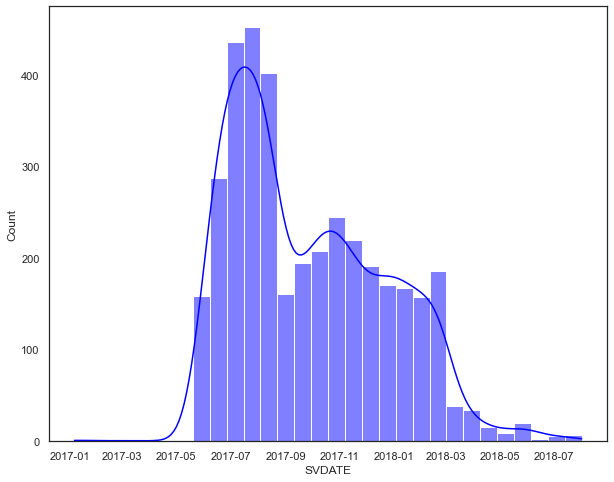

In [363]:
# Histogram to see the distribution.
sns.histplot(data = cycle_asl, x = 'SVDATE', color = 'blue', bins = 30, kde = True)

In [262]:
# Determine 5 boroughs with the longest of ASL in London.
df_asl = cycle_asl.groupby('BOROUGH')['ASL_FDR', 'ASL_FDRLFT', 'ASL_FDCENT',
                                        'ASL_FDRIGH', 'ASL_SHARED', 'asl_length_m'].sum().\
                        reset_index().sort_values(by='asl_length_m', ascending = False)
df_asl.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/3021501432.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_asl = cycle_asl.groupby('BOROUGH')['ASL_FDR', 'ASL_FDRLFT', 'ASL_FDCENT',


,BOROUGH,ASL_FDR,ASL_FDRLFT,ASL_FDCENT,ASL_FDRIGH,ASL_SHARED,asl_length_m
21,Lambeth,145,140,7,1,1,1595.787052
27,Southwark,128,123,5,3,1,1341.785448
5,Camden,124,108,10,9,0,1202.656519
31,Wandsworth,122,113,7,1,2,1072.695032
32,Westminster,118,114,4,0,1,1019.463326


In [263]:
# Overview summary statistics.
df_asl.describe()

,ASL_FDR,ASL_FDRLFT,ASL_FDCENT,ASL_FDRIGH,ASL_SHARED,asl_length_m
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,54.030303,51.363636,2.363636,0.818182,0.212121,524.931692
std,38.867149,36.721773,2.725094,1.685500,0.484612,376.268487
min,1.000000,1.000000,0.000000,0.000000,0.000000,27.150502
25%,27.000000,29.000000,0.000000,0.000000,0.000000,253.856426
50%,43.000000,41.000000,1.000000,0.000000,0.000000,423.912897
75%,68.000000,66.000000,3.000000,1.000000,0.000000,626.409370
max,145.000000,140.000000,10.000000,9.000000,2.000000,1595.787052


In [838]:
df_asl.to_csv('asl.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


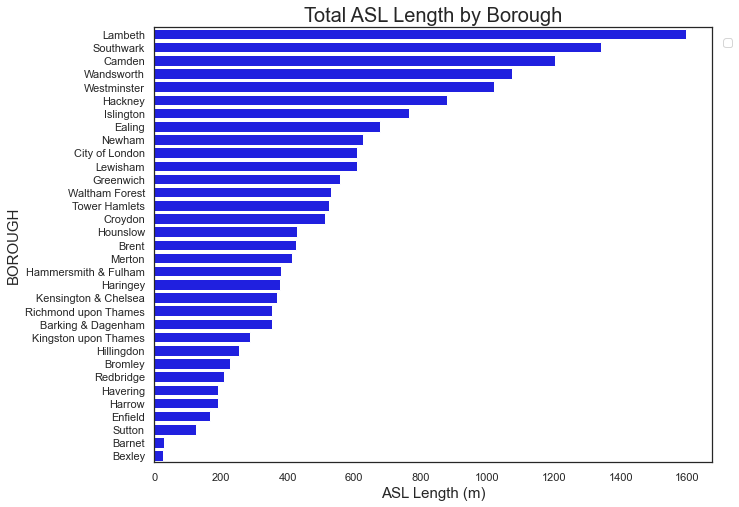

In [264]:
# Create a barplot.
c=sns.barplot(y='BOROUGH', x='asl_length_m', data=df_asl, color = 'blue')

# Annotate the axes, labels and ticks.
c.set_xlabel('ASL Length (m)', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title("Total ASL Length by Borough", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

In [265]:
# Determine change in ASL length by boroughs change over years in London.
df_asl1 = cycle_asl.groupby([cycle_asl['BOROUGH'], cycle_asl['SVDATE'].dt.year.rename('YEAR')])\
                                    ['ASL_FDR', 'ASL_FDRLFT', 'ASL_FDCENT',
                                    'ASL_FDRIGH', 'ASL_SHARED', 'asl_length_m'].sum().reset_index().\
                    sort_values(by=['asl_length_m'], ascending = False)
df_asl1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/1380196015.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_asl1 = cycle_asl.groupby([cycle_asl['BOROUGH'], cycle_asl['SVDATE'].dt.year.rename('YEAR')])\


,BOROUGH,YEAR,ASL_FDR,ASL_FDRLFT,ASL_FDCENT,ASL_FDRIGH,ASL_SHARED,asl_length_m
33,Lambeth,2017,140,133,7,1,0,1511.992468
45,Southwark,2017,124,117,4,3,1,1311.547775
7,Camden,2017,124,108,10,9,0,1175.377219
53,Wandsworth,2017,119,111,7,1,2,1050.172668
55,Westminster,2017,118,114,4,0,1,1010.714789


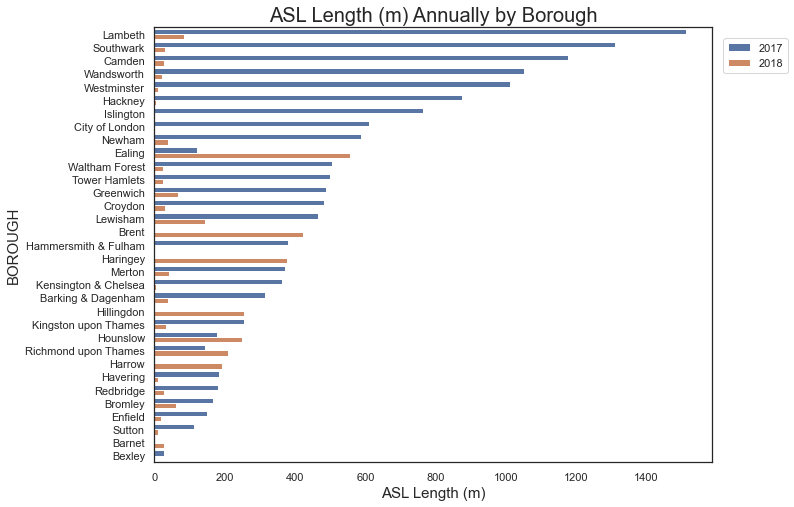

In [276]:
# Plot the ASL length changes by borough over years.
c=sns.barplot(y='BOROUGH', x='asl_length_m', data=df_asl1, hue = 'YEAR')

# Annotate the axes, labels and ticks.
c.set_xlabel('ASL Length (m)', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title('ASL Length (m) Annually by Borough', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# Signals For Cycles.

In [268]:
# Check the dataset with cycle lanes information.
cycle_signal = pd.read_csv('cycle_signal.csv')
print(cycle_signal.shape)
cycle_signal.head()

(443, 11)


,FEATURE_ID,SVDATE,SIG_HEAD,SIG_SEPARA,SIG_EARLY,SIG_TWOSTG,SIG_GATE,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG039736,2017-08-24,1,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG03...,https://cycleassetimages.data.tfl.gov.uk/RWG03...,"c(-0.1755857349, 51.5396791863)"
1,RWG039729,2017-07-06,1,0,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG03...,https://cycleassetimages.data.tfl.gov.uk/RWG03...,"c(-0.1759533843, 51.5396826444)"
2,RWG108125,2017-06-21,1,0,1,0,0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG10...,https://cycleassetimages.data.tfl.gov.uk/RWG10...,"c(-0.2247455377, 51.5052380151)"
3,RWG001914,2017-05-31,1,1,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1526615341, 51.5437873193)"
4,RWG001915,2017-05-31,1,1,0,0,0,Camden,https://cycleassetimages.data.tfl.gov.uk/RWG00...,https://cycleassetimages.data.tfl.gov.uk/RWG00...,"c(-0.1460845881, 51.5367136901)"


In [269]:
# Check the datatypes.
cycle_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FEATURE_ID  443 non-null    object
 1   SVDATE      443 non-null    object
 2   SIG_HEAD    443 non-null    int64 
 3   SIG_SEPARA  443 non-null    int64 
 4   SIG_EARLY   443 non-null    int64 
 5   SIG_TWOSTG  443 non-null    int64 
 6   SIG_GATE    443 non-null    int64 
 7   BOROUGH     443 non-null    object
 8   PHOTO1_URL  443 non-null    object
 9   PHOTO2_URL  443 non-null    object
 10  geometry    443 non-null    object
dtypes: int64(5), object(6)
memory usage: 38.2+ KB


In [270]:
# Check for missing values.
cycle_signal.isnull().sum()

FEATURE_ID    0
SVDATE        0
SIG_HEAD      0
SIG_SEPARA    0
SIG_EARLY     0
SIG_TWOSTG    0
SIG_GATE      0
BOROUGH       0
PHOTO1_URL    0
PHOTO2_URL    0
geometry      0
dtype: int64

In [271]:
# Convert 'SVDATE' column to datetime dtype.
cycle_signal['SVDATE'] = pd.to_datetime(cycle_signal['SVDATE'])
# Check the types.
cycle_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FEATURE_ID  443 non-null    object        
 1   SVDATE      443 non-null    datetime64[ns]
 2   SIG_HEAD    443 non-null    int64         
 3   SIG_SEPARA  443 non-null    int64         
 4   SIG_EARLY   443 non-null    int64         
 5   SIG_TWOSTG  443 non-null    int64         
 6   SIG_GATE    443 non-null    int64         
 7   BOROUGH     443 non-null    object        
 8   PHOTO1_URL  443 non-null    object        
 9   PHOTO2_URL  443 non-null    object        
 10  geometry    443 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 38.2+ KB


<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

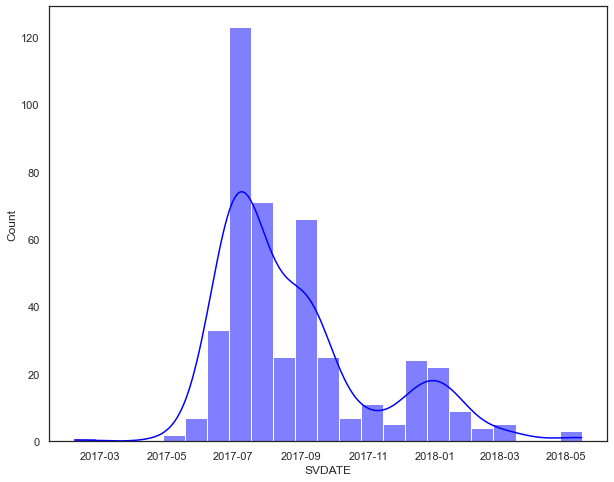

In [368]:
# Histogram to see the distribution.
sns.histplot(data = cycle_signal, x = 'SVDATE', color = 'blue', kde = True)

In [846]:
# Determine boroughs with the largest number of signals in London.
df_signal = cycle_signal.groupby('BOROUGH')['SIG_HEAD', 'SIG_SEPARA', 'SIG_EARLY',
                                            'SIG_TWOSTG', 'SIG_GATE'].sum().\
                        reset_index().sort_values(by='SIG_HEAD', ascending = False)
df_signal.head(10)

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/3453203181.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_signal = cycle_signal.groupby('BOROUGH')['SIG_HEAD', 'SIG_SEPARA', 'SIG_EARLY',


,BOROUGH,SIG_HEAD,SIG_SEPARA,SIG_EARLY,SIG_TWOSTG,SIG_GATE
22,Westminster,96,68,20,0,11
3,City of London,58,37,3,4,2
19,Tower Hamlets,57,25,14,13,2
14,Lambeth,44,27,9,0,2
18,Southwark,44,29,8,7,2
2,Camden,36,13,3,0,0
7,Hackney,22,11,7,1,0
21,Wandsworth,17,12,0,1,2
11,Islington,16,11,3,0,3
20,Waltham Forest,11,9,7,0,2


In [273]:
# Overview summary statistics.
df_signal.describe()

,SIG_HEAD,SIG_SEPARA,SIG_EARLY,SIG_TWOSTG,SIG_GATE
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,19.043478,11.130435,3.478261,1.217391,1.217391
std,25.180220,16.515294,5.229893,3.059360,2.354040
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000
50%,5.000000,2.000000,1.000000,0.000000,0.000000
75%,29.000000,12.500000,5.000000,0.500000,2.000000
max,96.000000,68.000000,20.000000,13.000000,11.000000


In [839]:
df_signal.to_csv('signal.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


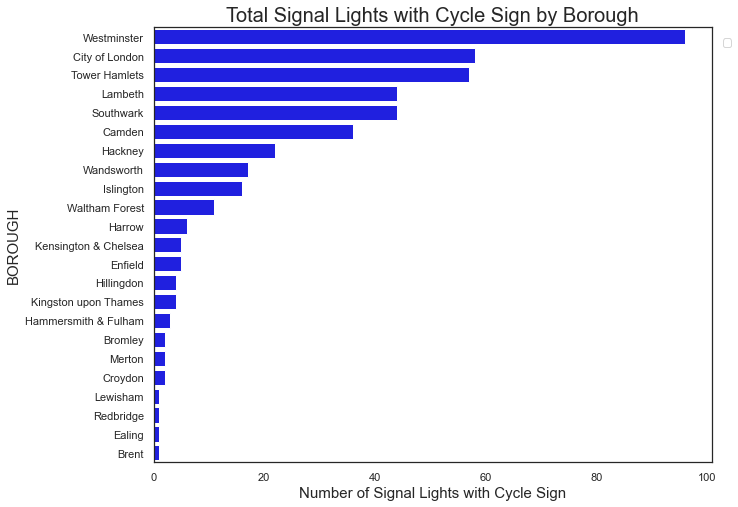

In [274]:
# Create a barplot.
c=sns.barplot(y='BOROUGH', x='SIG_HEAD', data=df_signal, color = 'blue')

# Annotate the axes, labels and ticks.
c.set_xlabel('Number of Signal Lights with Cycle Sign', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title("Total Signal Lights with Cycle Sign by Borough", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

In [275]:
# Determine change in signal lights for cyclists by boroughs change over years in London.
df_signal1 = cycle_signal.groupby([cycle_signal['BOROUGH'], cycle_signal['SVDATE'].dt.year.rename('YEAR')])\
                                    ['SIG_HEAD', 'SIG_SEPARA', 'SIG_EARLY',
                                    'SIG_TWOSTG', 'SIG_GATE'].sum().reset_index().\
                    sort_values(by=['SIG_GATE'], ascending = False)
df_signal1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/1240387777.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_signal1 = cycle_signal.groupby([cycle_signal['BOROUGH'], cycle_signal['SVDATE'].dt.year.rename('YEAR')])\


,BOROUGH,YEAR,SIG_HEAD,SIG_SEPARA,SIG_EARLY,SIG_TWOSTG,SIG_GATE
31,Westminster,2017,96,68,20,0,11
15,Islington,2017,16,11,3,0,3
4,City of London,2017,57,37,3,4,2
27,Tower Hamlets,2017,52,24,12,11,2
19,Lambeth,2017,34,22,4,0,2


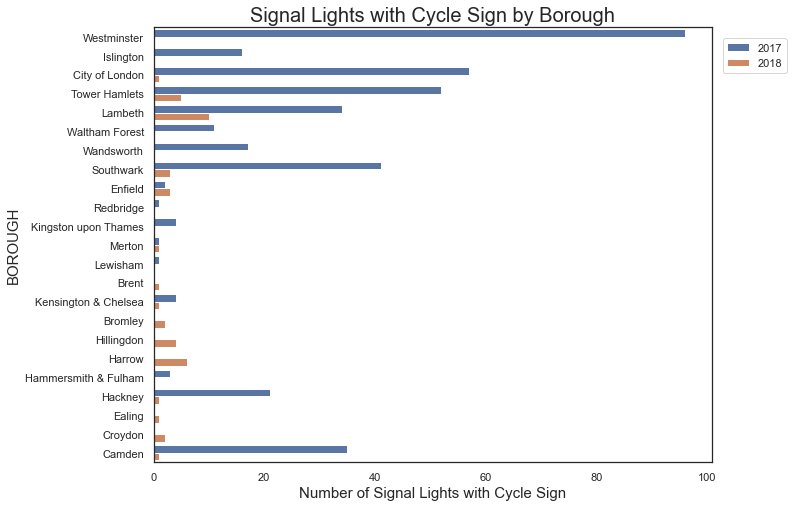

In [277]:
# Plot the signal lights for cyclists by borough over years.
c=sns.barplot(y='BOROUGH', x='SIG_HEAD', data=df_signal1, hue = 'YEAR')

# Annotate the axes, labels and ticks.
c.set_xlabel('Number of Signal Lights with Cycle Sign', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title('Signal Lights with Cycle Sign by Borough', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# Crossings For Cycles.

In [862]:
# Check the dataset with cycle lanes information.
cycle_cross = pd.read_csv('cycle_cross.csv')
print(cycle_cross.shape)
cycle_cross.head()

(1687, 12)


,FEATURE_ID,SVDATE,CRS_SIGNAL,CRS_SEGREG,CRS_CYGAP,CRS_PEDEST,CRS_LEVEL,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,cross_length_m
0,RWG150471,2017-09-17,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(-0.0813618204, -0.0814923292, 51.636843...",11.602453
1,RWG150537,2017-09-27,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(-0.1237165558, -0.1237476924, 51.651697...",8.595692
2,RWG187222,2017-09-28,1,1,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.1097495774, -0.1097409659, 51.615594...",17.172971
3,RWG187223,2017-09-28,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.1019413172, -0.1018617852, -0.101791...",27.245645
4,RWG187224,2018-01-19,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.0457269989, -0.0458484188, 51.627070...",8.710514


In [863]:
# Check the datatypes.
cycle_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FEATURE_ID      1687 non-null   object 
 1   SVDATE          1687 non-null   object 
 2   CRS_SIGNAL      1687 non-null   int64  
 3   CRS_SEGREG      1687 non-null   int64  
 4   CRS_CYGAP       1687 non-null   int64  
 5   CRS_PEDEST      1687 non-null   int64  
 6   CRS_LEVEL       1687 non-null   int64  
 7   BOROUGH         1687 non-null   object 
 8   PHOTO1_URL      1687 non-null   object 
 9   PHOTO2_URL      1687 non-null   object 
 10  geometry        1687 non-null   object 
 11  cross_length_m  1687 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 158.3+ KB


In [864]:
# Check for missing values.
cycle_cross.isnull().sum()

FEATURE_ID        0
SVDATE            0
CRS_SIGNAL        0
CRS_SEGREG        0
CRS_CYGAP         0
CRS_PEDEST        0
CRS_LEVEL         0
BOROUGH           0
PHOTO1_URL        0
PHOTO2_URL        0
geometry          0
cross_length_m    0
dtype: int64

In [865]:
# Convert 'SVDATE' column to datetime dtype.
cycle_cross['SVDATE'] = pd.to_datetime(cycle_cross['SVDATE'])
# Check the types.
cycle_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FEATURE_ID      1687 non-null   object        
 1   SVDATE          1687 non-null   datetime64[ns]
 2   CRS_SIGNAL      1687 non-null   int64         
 3   CRS_SEGREG      1687 non-null   int64         
 4   CRS_CYGAP       1687 non-null   int64         
 5   CRS_PEDEST      1687 non-null   int64         
 6   CRS_LEVEL       1687 non-null   int64         
 7   BOROUGH         1687 non-null   object        
 8   PHOTO1_URL      1687 non-null   object        
 9   PHOTO2_URL      1687 non-null   object        
 10  geometry        1687 non-null   object        
 11  cross_length_m  1687 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 158.3+ KB


<AxesSubplot:xlabel='SVDATE', ylabel='Count'>

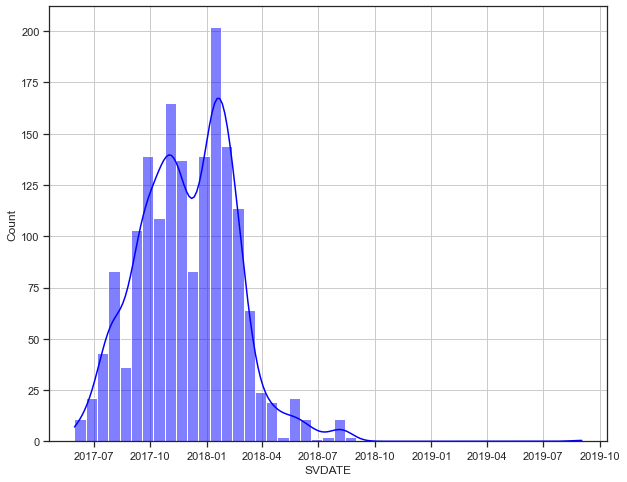

In [866]:
# Histogram to see the distribution.
sns.histplot(data = cycle_cross, x = 'SVDATE', color = 'blue', kde = True)

In [869]:
cycle_cross['TOTAL_CRS'] = cycle_cross[['CRS_SIGNAL', 'CRS_SEGREG', 'CRS_CYGAP','CRS_PEDEST', 'CRS_LEVEL']].sum(axis=1)
cycle_cross.head()

,FEATURE_ID,SVDATE,CRS_SIGNAL,CRS_SEGREG,CRS_CYGAP,CRS_PEDEST,CRS_LEVEL,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,cross_length_m,TOTAl_CRS,TOTAL_CRS
0,RWG150471,2017-09-17,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(-0.0813618204, -0.0814923292, 51.636843...",11.602453,1,1
1,RWG150537,2017-09-27,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(-0.1237165558, -0.1237476924, 51.651697...",8.595692,1,1
2,RWG187222,2017-09-28,1,1,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.1097495774, -0.1097409659, 51.615594...",17.172971,2,2
3,RWG187223,2017-09-28,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.1019413172, -0.1018617852, -0.101791...",27.245645,1,1
4,RWG187224,2018-01-19,1,0,0,0,0,Enfield,https://cycleassetimages.data.tfl.gov.uk/RWG18...,https://cycleassetimages.data.tfl.gov.uk/RWG18...,"list(c(-0.0457269989, -0.0458484188, 51.627070...",8.710514,1,1


In [872]:
# Determine 5 boroughs with the largest number of signals in London.
df_cross = cycle_cross.groupby('BOROUGH')['CRS_SIGNAL', 'CRS_SEGREG', 'CRS_CYGAP',
                                            'CRS_PEDEST', 'CRS_LEVEL', 'TOTAL_CRS'].sum().\
                        reset_index().sort_values(by='TOTAL_CRS', ascending = False)
df_cross.head(10)

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/1725196314.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cross = cycle_cross.groupby('BOROUGH')['CRS_SIGNAL', 'CRS_SEGREG', 'CRS_CYGAP',


,BOROUGH,CRS_SIGNAL,CRS_SEGREG,CRS_CYGAP,CRS_PEDEST,CRS_LEVEL,TOTAL_CRS
24,Newham,106,7,1,4,0,118
27,Southwark,53,27,18,0,0,98
16,Hillingdon,49,29,8,5,0,91
9,Enfield,50,24,10,2,0,86
17,Hounslow,71,5,3,0,0,79
32,Westminster,39,20,13,1,0,73
10,Greenwich,54,10,4,0,0,68
20,Kingston upon Thames,38,16,6,8,0,68
23,Merton,47,9,6,2,2,66
7,Croydon,39,4,2,5,16,66


In [873]:
# Overview summary statistics.
df_cross.describe()

,CRS_SIGNAL,CRS_SEGREG,CRS_CYGAP,CRS_PEDEST,CRS_LEVEL,TOTAL_CRS
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,38.000000,9.636364,3.757576,1.272727,0.606061,53.272727
std,19.369757,8.820495,4.279532,1.924720,2.794407,24.167738
min,10.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,25.000000,3.000000,1.000000,0.000000,0.000000,35.000000
50%,39.000000,7.000000,2.000000,1.000000,0.000000,53.000000
75%,49.000000,12.000000,6.000000,1.000000,0.000000,66.000000
max,106.000000,34.000000,18.000000,8.000000,16.000000,118.000000


In [874]:
df_cross.to_csv('cross.csv')

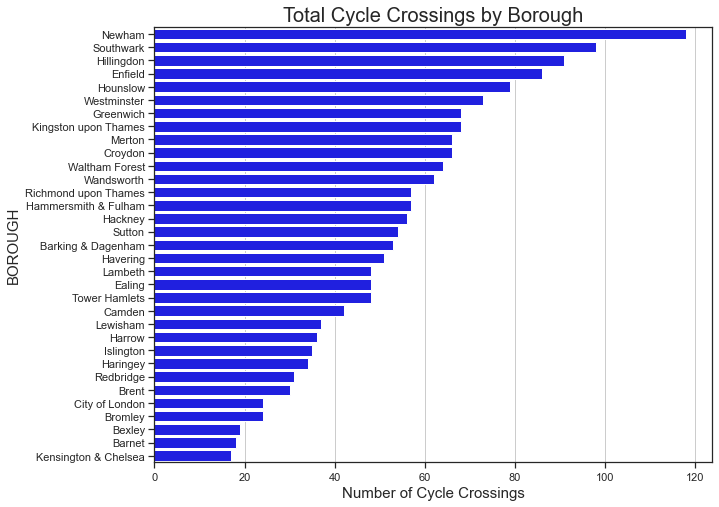

In [876]:
# Create a barplot.
c=sns.barplot(y='BOROUGH', x='TOTAL_CRS', data=df_cross, color = 'blue')

# Annotate the axes, labels and ticks.
c.set_xlabel('Number of Cycle Crossings', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title("Total Cycle Crossings by Borough", fontsize=20)
i=0

In [877]:
# Determine change in crossings for cyclists by boroughs change over years in London.
df_cross1 = cycle_cross.groupby([cycle_cross['BOROUGH'], cycle_cross['SVDATE'].dt.year.rename('YEAR')])\
                                    ['CRS_SIGNAL', 'CRS_SEGREG', 'CRS_CYGAP',
                                    'CRS_PEDEST', 'CRS_LEVEL', 'TOTAL_CRS'].sum().reset_index().\
                    sort_values(by=['TOTAL_CRS'], ascending = False)
df_cross1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/255497331.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cross1 = cycle_cross.groupby([cycle_cross['BOROUGH'], cycle_cross['SVDATE'].dt.year.rename('YEAR')])\


,BOROUGH,YEAR,CRS_SIGNAL,CRS_SEGREG,CRS_CYGAP,CRS_PEDEST,CRS_LEVEL,TOTAL_CRS
44,Newham,2017,89,6,0,4,0,99
50,Southwark,2017,52,23,14,0,0,89
30,Hillingdon,2018,46,29,8,5,0,88
60,Westminster,2017,39,20,13,1,0,73
13,Croydon,2017,38,3,2,5,14,62


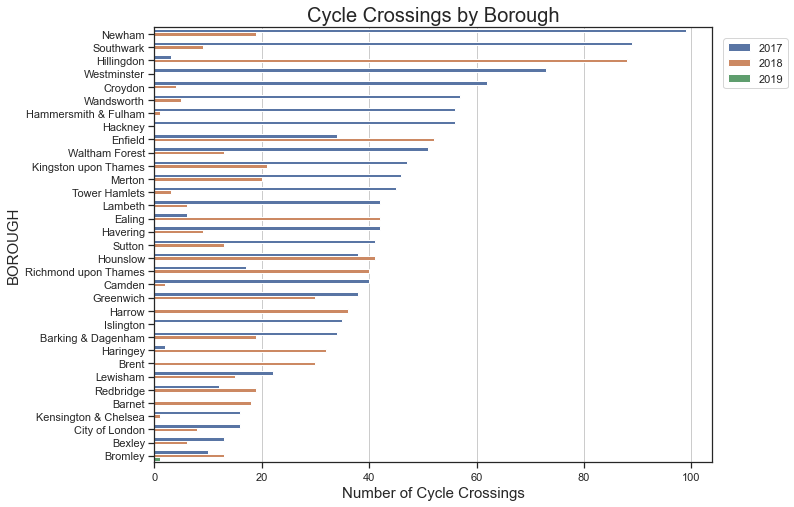

In [878]:
# Plot the crossings for cyclists by borough over years.
c=sns.barplot(y='BOROUGH', x='TOTAL_CRS', data=df_cross1, hue = 'YEAR')

# Annotate the axes, labels and ticks.
c.set_xlabel('Number of Cycle Crossings', fontsize=15)
c.set_ylabel('BOROUGH', fontsize=15)
c.set_title('Cycle Crossings by Borough', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

# Cycling Statistics 

In [783]:
# Read the provided CSV file/data set.
london_central = pd.read_csv('L_centr_fnl_0.csv') 
london_inner = pd.read_csv('london_inner_cl.csv')
london_outer = pd.read_csv('london_outer_cl.csv')
london_sites = pd.read_csv('london_sites_cl.csv')

# Central London.

In [784]:
london_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      758163 non-null  int64  
 1   Survey wave (calendar quarter)  758163 non-null  object 
 2   Equivalent financial quarter    758163 non-null  object 
 3   Site ID                         758163 non-null  object 
 4   Location                        758163 non-null  object 
 5   Survey date                     747751 non-null  object 
 6   Weather                         758163 non-null  object 
 7   Time                            758163 non-null  object 
 8   Period                          758163 non-null  object 
 9   Direction                       758163 non-null  object 
 10  Start hour                      758163 non-null  float64
 11  Start minute                    758163 non-null  float64
 12  Number of privat

In [785]:
# Convert 'Date' column to datetime dtype.
london_central['Date'] = pd.to_datetime(london_central['Date'])
# Check the types.
london_central.head()

,Unnamed: 0,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,...,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year,Month,Quarter,Year-Quarter,Day,Total_cycles
0,0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,...,2014,Q1,January-March,2014-01-24,2014,January,Q1,2014-Q1,Friday,0.0
1,1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,...,2014,Q1,January-March,2014-01-24,2014,January,Q1,2014-Q1,Friday,15.0
2,2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,...,2014,Q1,January-March,2014-01-24,2014,January,Q1,2014-Q1,Friday,35.0
3,3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,...,2014,Q1,January-March,2014-01-24,2014,January,Q1,2014-Q1,Friday,61.0
4,4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,...,2014,Q1,January-March,2014-01-24,2014,January,Q1,2014-Q1,Friday,73.0


In [786]:
# Subset the London Central data from 2017-2019 timeframe.
inf_lc = london_central.loc[(london_central['Year'] >= 2017) & (london_central['Year'] <= 2019)]
inf_lc.head()

,Unnamed: 0,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,...,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year,Month,Quarter,Year-Quarter,Day,Total_cycles
308160,308160,2017 Q1 (January-March),2016-17 Q4,CENCY001,Millbank (south of Thorney Street),"lun, 13/03/17",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,...,2017,Q1,January-March,2017-03-13,2017,March,Q1,2017-Q1,Monday,23.0
308161,308161,2017 Q1 (January-March),2016-17 Q4,CENCY001,Millbank (south of Thorney Street),"lun, 13/03/17",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,...,2017,Q1,January-March,2017-03-13,2017,March,Q1,2017-Q1,Monday,46.0
308162,308162,2017 Q1 (January-March),2016-17 Q4,CENCY001,Millbank (south of Thorney Street),"lun, 13/03/17",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,...,2017,Q1,January-March,2017-03-13,2017,March,Q1,2017-Q1,Monday,61.0
308163,308163,2017 Q1 (January-March),2016-17 Q4,CENCY001,Millbank (south of Thorney Street),"lun, 13/03/17",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,...,2017,Q1,January-March,2017-03-13,2017,March,Q1,2017-Q1,Monday,86.0
308164,308164,2017 Q1 (January-March),2016-17 Q4,CENCY001,Millbank (south of Thorney Street),"lun, 13/03/17",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,...,2017,Q1,January-March,2017-03-13,2017,March,Q1,2017-Q1,Monday,105.0


In [787]:
# Drop columns we dont need.
inf_lc = inf_lc.drop(columns = ['Unnamed: 0', 'Survey wave (calendar quarter)', 'Equivalent financial quarter',
                     'Survey date', 'Survey_wave_year', 'Survey_wave_quater', 'Survey_wave_months'])
inf_lc.head()

,Site ID,Location,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Year,Month,Quarter,Year-Quarter,Day,Total_cycles
308160,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,23,0,23,2017-03-13,2017,March,Q1,2017-Q1,Monday,23.0
308161,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,42,4,46,2017-03-13,2017,March,Q1,2017-Q1,Monday,46.0
308162,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,60,1,61,2017-03-13,2017,March,Q1,2017-Q1,Monday,61.0
308163,CENCY001,Millbank (south of Thorney Street),Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,82,4,86,2017-03-13,2017,March,Q1,2017-Q1,Monday,86.0
308164,CENCY001,Millbank (south of Thorney Street),Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,104,1,105,2017-03-13,2017,March,Q1,2017-Q1,Monday,105.0


In [788]:
# renaming columns to have a unique identifier for both datasets. 
london_sites = london_sites.rename(columns={'UnqID': 'Site ID'})

In [789]:
# Merge the subset with the information by borough.
inf_lc = pd.merge(inf_lc,
                 london_sites[['Site ID','Borough', 'Functional cycling area']],
                 on='Site ID')
inf_lc.head()

,Site ID,Location,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Year,Month,Quarter,Year-Quarter,Day,Total_cycles,Borough,Functional cycling area
0,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,23,0,23,2017-03-13,2017,March,Q1,2017-Q1,Monday,23.0,Westminster,Central
1,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,42,4,46,2017-03-13,2017,March,Q1,2017-Q1,Monday,46.0,Westminster,Central
2,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,60,1,61,2017-03-13,2017,March,Q1,2017-Q1,Monday,61.0,Westminster,Central
3,CENCY001,Millbank (south of Thorney Street),Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,82,4,86,2017-03-13,2017,March,Q1,2017-Q1,Monday,86.0,Westminster,Central
4,CENCY001,Millbank (south of Thorney Street),Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,104,1,105,2017-03-13,2017,March,Q1,2017-Q1,Monday,105.0,Westminster,Central


In [790]:
inf_lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318336 entries, 0 to 318335
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Site ID                     318336 non-null  object        
 1   Location                    318336 non-null  object        
 2   Weather                     318336 non-null  object        
 3   Time                        318336 non-null  object        
 4   Period                      318336 non-null  object        
 5   Direction                   318336 non-null  object        
 6   Start hour                  318336 non-null  float64       
 7   Start minute                318336 non-null  float64       
 8   Number of private cycles    318336 non-null  int64         
 9   Number of cycle hire bikes  318336 non-null  int64         
 10  Total cycles                318336 non-null  int64         
 11  Date                        314624 non-

In [799]:
# Determine boroughs by total cycles count.
df1 = inf_lc.groupby(['Borough', 'Year'])['Number of private cycles',
                                   'Number of cycle hire bikes', 'Total cycles'].sum().\
                        reset_index().sort_values(by=['Borough', 'Year','Total cycles'])
df1.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/3822366617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = inf_lc.groupby(['Borough', 'Year'])['Number of private cycles',


,Borough,Year,Number of private cycles,Number of cycle hire bikes,Total cycles
0,Camden,2017,236667,29543,266210
1,Camden,2018,255108,30952,286060
2,Camden,2019,265966,30832,296798
3,City of London,2017,383822,48528,432350
4,City of London,2018,435882,54919,490801


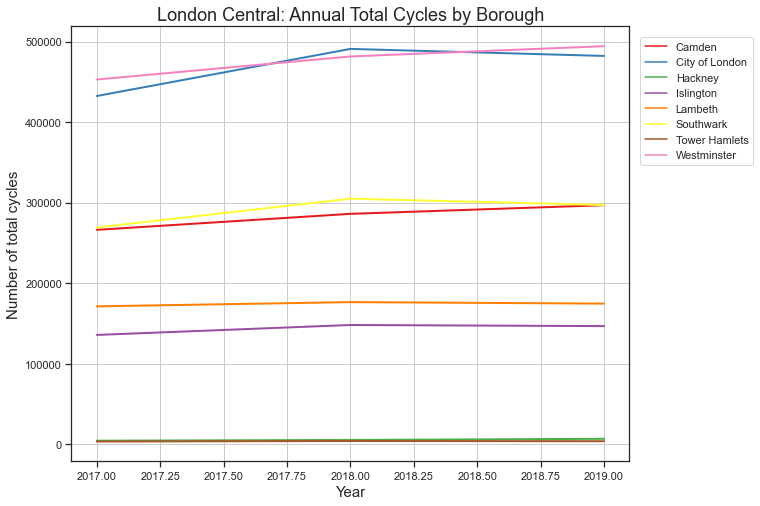

In [798]:
# Create a lineplot.
b=sns.lineplot(x='Year', y='Total cycles', hue = 'Borough',
            data=df1, ci=None, palette = "Set1", linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Year', fontsize=15)
b.set_ylabel('Number of total cycles', fontsize=15)
b.set_title("London Central: Annual Total Cycles by Borough", fontsize=18)
#sns.set_style('ticks',{'axes.grid' : True})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

In [800]:
cycle_parking.tail()

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,Year-Quarter
23753,RWG260420,2018-01-19,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.2945334982, 51.5953733904)",2018Q1
23754,RWG260729,2018-02-02,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.3617845291, 51.5865533999)",2018Q1
23755,RWG238365,2018-01-23,0,0,0,0,1,0,0,0,...,0,0,0,1,2,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.3984977491, 51.5275728185)",2018Q1
23756,RWG238366,2018-01-23,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.4115516545, 51.5724385619)",2018Q1
23757,RWG238427,2018-01-25,0,0,0,0,1,0,0,0,...,0,0,0,1,2,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.4154625595, 51.608777472)",2018Q1


In [801]:
# Add Year-Quarter column.
cycle_parking['Year-Quarter'] = cycle_parking['SVDATE'].dt.to_period('Q').astype("string")
cycle_parking.head()

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,Year-Quarter
0,RWG014703,2017-09-07,0,0,0,0,0,0,0,0,...,1,0,0,1,6,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427797672, 51.5103212773)",2017Q3
1,RWG014704,2017-09-07,0,0,0,0,0,0,0,0,...,1,0,0,1,6,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427846609, 51.5102610544)",2017Q3
2,RWG014970,2017-06-20,0,0,0,0,1,0,0,0,...,0,0,0,1,2,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2405751224, 51.5014706358)",2017Q2
3,RWG015506,2017-06-24,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2382877591, 51.5065007339)",2017Q2
4,RWG015513,2017-09-07,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2384457427, 51.5062848196)",2017Q3


In [802]:
# Define Central Boroughs from the bike_sites information.
dictionary = london_sites[['Borough', 'Functional cycling area', 'Location']]
dictionary.loc[dictionary['Functional cycling area'] == 'Central', ['Borough']].value_counts()

Borough       
Westminster       106
Camden             62
Southwark          61
City of London     53
Lambeth            46
Islington          33
Hackney             2
Tower Hamlets       1
dtype: int64

In [829]:
# Subset the London Parking data for Central London boroughs.
df_parking2 = cycle_parking.loc[(cycle_parking['BOROUGH'] == 'Westminster') | (cycle_parking['BOROUGH'] == 'City of London') |\
                             (cycle_parking['BOROUGH'] == 'Camden') | (cycle_parking['BOROUGH'] == 'Southwark') |\
                             (cycle_parking['BOROUGH'] == 'Lambeth') | (cycle_parking['BOROUGH'] == 'Islington') |\
                             (cycle_parking['BOROUGH'] == 'Hackney') | (cycle_parking['BOROUGH'] == 'Tower Hamlets')]
df_parking2.head()

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,Year-Quarter
209,RWG014733,2017-09-07,0,0,0,0,0,0,0,1,...,0,0,0,1,2,Westminster,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.1909639702, 51.5154537606)",2017Q3
210,RWG014736,2017-09-07,0,0,0,0,0,0,0,1,...,0,0,0,1,2,Westminster,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.1900247434, 51.5156370783)",2017Q3
608,RWG048122,2017-08-31,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Westminster,https://cycleassetimages.data.tfl.gov.uk/RWG04...,https://cycleassetimages.data.tfl.gov.uk/RWG04...,"c(-0.1877521041, 51.5167194739)",2017Q3
609,RWG048093,2017-08-31,0,0,0,0,1,0,0,0,...,0,0,0,5,10,Westminster,https://cycleassetimages.data.tfl.gov.uk/RWG04...,https://cycleassetimages.data.tfl.gov.uk/RWG04...,"c(-0.1775036322, 51.5232711674)",2017Q3
610,RWG014996,2017-06-20,0,0,0,0,1,0,0,0,...,0,0,0,2,4,Westminster,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.1863730394, 51.5117532835)",2017Q2


In [804]:
# Determine cycle parking capacity change over years in Central London.
df_parking2 = df_parking2.groupby(([df_parking2['BOROUGH'], df_parking2['SVDATE'].dt.year.rename('Year')]))\
                                     ['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',
                                      'PRK_SHEFF', 'PRK_MSTAND', 'PRK_PSTAND',
                                      'PRK_HOOP', 'PRK_POST', 'PRK_BUTERF',
                                      'PRK_WHEEL', 'PRK_HANGAR', 'PRK_TIER',
                                      'PRK_OTHER', 'PRK_PROVIS', 'PRK_CPT'].sum().reset_index().\
                    sort_values(by=['BOROUGH', 'Year','PRK_CPT'])
df_parking2.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/2314863800.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_parking2 = df_parking2.groupby(([df_parking2['BOROUGH'], df_parking2['SVDATE'].dt.year.rename('Year')]))\


,BOROUGH,Year,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
0,Camden,2017,35,52,0,667,716,1,164,2,9,9,18,9,38,4327,8993
1,Camden,2018,1,0,0,1,3,0,0,0,0,0,0,0,0,15,30
2,City of London,2017,2,14,0,260,0,0,11,0,2,9,0,1,8,1346,2884
3,City of London,2018,0,0,0,13,0,0,0,0,0,0,0,0,0,81,162
4,Hackney,2017,243,65,83,1276,10,2,503,0,17,5,299,1,95,5330,12310


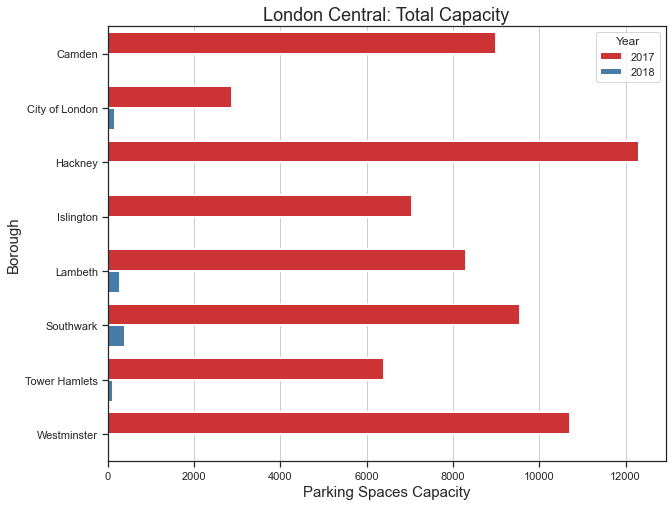

In [828]:
# Create a lineplot.
b=sns.barplot(y='BOROUGH', x='PRK_CPT', hue = 'Year',
            data=df_parking2, ci=None, palette = "Set1", linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Parking Spaces Capacity', fontsize=15)
b.set_ylabel('Borough', fontsize=15)
b.set_title("London Central: Total Capacity", fontsize=18)
sns.set_style('ticks',{'axes.grid' : True})
i=0

In [819]:
# Determine cycle parking capacity change over years in Central London.
df_parking3 = df_parking2.groupby(['BOROUGH'])\
                                     ['PRK_CARR', 'PRK_COVER', 'PRK_LOCKER',
                                      'PRK_SHEFF', 'PRK_MSTAND', 'PRK_PSTAND',
                                      'PRK_HOOP', 'PRK_POST', 'PRK_BUTERF',
                                      'PRK_WHEEL', 'PRK_HANGAR', 'PRK_TIER',
                                      'PRK_OTHER', 'PRK_PROVIS', 'PRK_CPT'].sum().reset_index().\
                    sort_values(by=['PRK_CPT'])
df_parking3.head()

/var/folders/td/h_nv_xmx2dj31ym4jqxrtjs00000gn/T/ipykernel_51728/2093989306.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_parking3 = df_parking2.groupby(['BOROUGH'])\


,BOROUGH,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
1,City of London,2,14,0,273,0,0,11,0,2,9,0,1,8,1427,3046
6,Tower Hamlets,8,90,26,674,4,4,43,0,11,1,11,3,73,3011,6535
3,Islington,10,36,0,999,4,0,174,7,11,4,8,0,41,3438,7046
4,Lambeth,137,59,3,980,19,18,185,1,14,4,148,12,45,3522,8590
0,Camden,36,52,0,668,719,1,164,2,9,9,18,9,38,4342,9023


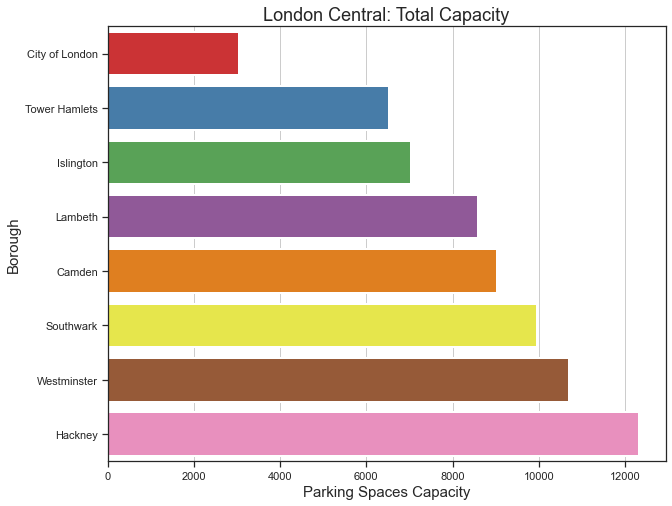

In [820]:
# Create a lineplot.
b=sns.barplot(y='BOROUGH', x='PRK_CPT',
            data=df_parking3, ci=None, palette = "Set1", linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Parking Spaces Capacity', fontsize=15)
b.set_ylabel('Borough', fontsize=15)
b.set_title("London Central: Total Capacity", fontsize=18)
sns.set_style('ticks',{'axes.grid' : True})
i=0

In [821]:
population = pd.read_csv('Population.csv')
population.head()

,BOROUGH,Area,Population
0,Camden,Inner,260000
1,City of London,Inner,7900
2,Hackney,Inner,285000
3,Hammersmith and Fulham,Inner,180000
4,Haringey,Inner,279000


In [822]:
df_parking3.head()

,BOROUGH,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT
1,City of London,2,14,0,273,0,0,11,0,2,9,0,1,8,1427,3046
6,Tower Hamlets,8,90,26,674,4,4,43,0,11,1,11,3,73,3011,6535
3,Islington,10,36,0,999,4,0,174,7,11,4,8,0,41,3438,7046
4,Lambeth,137,59,3,980,19,18,185,1,14,4,148,12,45,3522,8590
0,Camden,36,52,0,668,719,1,164,2,9,9,18,9,38,4342,9023


In [823]:
# Add Population by borough information.
df_parking3 = pd.merge(df_parking3, population, on = 'BOROUGH')
df_parking3.head()

,BOROUGH,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,Area,Population
0,City of London,2,14,0,273,0,0,11,0,2,9,0,1,8,1427,3046,Inner,7900
1,Tower Hamlets,8,90,26,674,4,4,43,0,11,1,11,3,73,3011,6535,Inner,320000
2,Islington,10,36,0,999,4,0,174,7,11,4,8,0,41,3438,7046,Inner,240000
3,Lambeth,137,59,3,980,19,18,185,1,14,4,148,12,45,3522,8590,Inner,328000
4,Camden,36,52,0,668,719,1,164,2,9,9,18,9,38,4342,9023,Inner,260000


In [824]:
# Calculate parking per 1000 of borough population.
df_parking3["Capacity per 1000 population"] = df_parking3['PRK_CPT']*1000/df_parking3['Population']
df_parking3.head(50)

,BOROUGH,PRK_CARR,PRK_COVER,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,PRK_POST,PRK_BUTERF,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,Area,Population,Capacity per 1000 population
0,City of London,2,14,0,273,0,0,11,0,2,9,0,1,8,1427,3046,Inner,7900,385.569620
1,Tower Hamlets,8,90,26,674,4,4,43,0,11,1,11,3,73,3011,6535,Inner,320000,20.421875
2,Islington,10,36,0,999,4,0,174,7,11,4,8,0,41,3438,7046,Inner,240000,29.358333
3,Lambeth,137,59,3,980,19,18,185,1,14,4,148,12,45,3522,8590,Inner,328000,26.189024
4,Camden,36,52,0,668,719,1,164,2,9,9,18,9,38,4342,9023,Inner,260000,34.703846
5,Southwark,84,63,103,1231,4,4,3,2,10,12,99,4,39,4929,9951,Inner,321000,31.000000
6,Westminster,21,28,0,1049,4,4,506,6,15,1,2,0,17,5289,10703,Inner,253000,42.304348
7,Hackney,243,65,83,1277,10,2,503,0,18,6,299,1,95,5332,12322,Inner,285000,43.235088


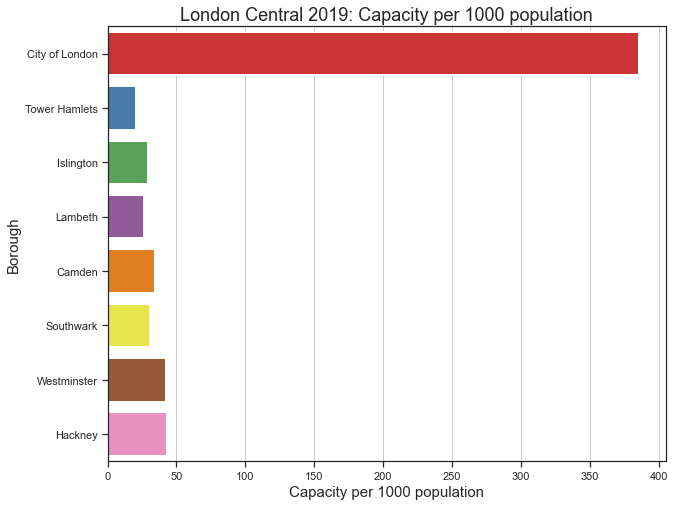

In [827]:
# Create a lineplot.
b=sns.barplot(y='BOROUGH', x='Capacity per 1000 population',
            data=df_parking3, ci=None, palette = "Set1", linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Capacity per 1000 population', fontsize=15)
b.set_ylabel('Borough', fontsize=15)
b.set_title("London Central 2019: Capacity per 1000 population", fontsize=18)
sns.set_style('ticks',{'axes.grid' : True})
i=0